In [2]:
# # Import libraries for pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import libraries for model selection

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv('../Preprocessing/model_df.csv')
df.head()

,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak
0,Anderlecht,1.0,NaN,Mechelen,0.0,NaN,A,6,12,6,12
1,Roeselare,1.0,NaN,Charleroi,1.0,NaN,D,9,1,9,1
2,Bergen,1.0,NaN,Club Brugge,2.0,NaN,H,21,3,21,3
3,Germinal,2.0,NaN,Dender,1.0,NaN,A,2,3,2,3
4,Westerlo,1.0,NaN,FC Brussels,0.0,NaN,A,3,3,3,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AwayTeam            6293 non-null   object 
 1   AwayGoals           6293 non-null   float64
 2   AwayShotsOnTarget   1983 non-null   float64
 3   HomeTeam            6293 non-null   object 
 4   HomeGoals           6293 non-null   float64
 5   HomeShotsOnTarget   1983 non-null   float64
 6   FullTimeResult      6293 non-null   object 
 7   HomeTeamWinStreak   6293 non-null   int64  
 8   AwayTeamWinStreak   6293 non-null   int64  
 9   HomeTeamLossStreak  6293 non-null   int64  
 10  AwayTeamLossStreak  6293 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 540.9+ KB


In [9]:
import pandas as pd

# Assuming your DataFrame is named 'data'

# 4. Win streak difference (HomeTeamWinStreak - AwayTeamWinStreak)
df['win_streak_difference'] = df['HomeTeamWinStreak'] - df['AwayTeamWinStreak']

# 5. Loss streak difference (HomeTeamLossStreak - AwayTeamLossStreak)
df['loss_streak_difference'] = df['HomeTeamLossStreak'] - df['AwayTeamLossStreak']


# 7. create last 10 games goal for home and away

df['HomeTeamLast10Goals'] = df['HomeGoals'] - df['HomeGoals'].shift(10)

df['AwayTeamLast10Goals'] = df['AwayGoals'] - df['AwayGoals'].shift(10)

# 8. create last 10 games win for home and away

df['HomeTeamLast10Wins'] = df['HomeTeamWinStreak'] - df['HomeTeamWinStreak'].shift(10)
df['AwayTeamLast10Wins'] = df['AwayTeamWinStreak'] - df['AwayTeamWinStreak'].shift(10)


# If 'club_value' is only present for one team, you could modify this to make it more meaningful.

# Check the df_imputedFrame to ensure features have been added
df.head()

,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak,win_streak_difference,loss_streak_difference,HomeTeamLast10Goals,AwayTeamLast10Goals,HomeTeamLast10Wins,AwayTeamLast10Wins
0,Anderlecht,1.0,NaN,Mechelen,0.0,NaN,A,6,12,6,12,-6,-6,NaN,NaN,NaN,NaN
1,Roeselare,1.0,NaN,Charleroi,1.0,NaN,D,9,1,9,1,8,8,NaN,NaN,NaN,NaN
2,Bergen,1.0,NaN,Club Brugge,2.0,NaN,H,21,3,21,3,18,18,NaN,NaN,NaN,NaN
3,Germinal,2.0,NaN,Dender,1.0,NaN,A,2,3,2,3,-1,-1,NaN,NaN,NaN,NaN
4,Westerlo,1.0,NaN,FC Brussels,0.0,NaN,A,3,3,3,3,0,0,NaN,NaN,NaN,NaN


In [10]:

import os
import pickle
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded

columns = ['HomeTeam', 'AwayTeam','FullTimeResult']

le = LabelEncoder() 

# Encode the columns

df[columns] = df[columns].apply(le.fit_transform)


# Define the path and filename
path = '../Streamlit/'
filename = 'le.pkl'  # Naming the file appropriately for multiple encoders
file_path = os.path.join(path, filename)

# save the encoder

with open(file_path, 'wb') as file:

    pickle.dump(le, file)







In [11]:
df.head()

,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak,win_streak_difference,loss_streak_difference,HomeTeamLast10Goals,AwayTeamLast10Goals,HomeTeamLast10Wins,AwayTeamLast10Wins
0,1,1.0,NaN,22,0.0,NaN,0,6,12,6,12,-6,-6,NaN,NaN,NaN,NaN
1,29,1.0,NaN,7,1.0,NaN,1,9,1,9,1,8,8,NaN,NaN,NaN,NaN
2,4,1.0,NaN,8,2.0,NaN,2,21,3,21,3,18,18,NaN,NaN,NaN,NaN
3,14,2.0,NaN,9,1.0,NaN,0,2,3,2,3,-1,-1,NaN,NaN,NaN,NaN
4,37,1.0,NaN,11,0.0,NaN,0,3,3,3,3,0,0,NaN,NaN,NaN,NaN


In [12]:
# fill missing values 

from sklearn.impute import KNNImputer

def fill_missing_values(df):
    imputer = KNNImputer(n_neighbors=50)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

df_imputed = fill_missing_values(df)

In [191]:
df_imputed.columns

Index(['club_value', 'AwayTeam', 'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam',
       'HomeGoals', 'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak',
       'goal_difference', 'win_streak_difference', 'loss_streak_difference',
       'club_value_difference', 'HomeTeamLast10Goals', 'AwayTeamLast10Goals',
       'HomeTeamLast10Wins', 'AwayTeamLast10Wins', 'HomeTeamClubValue',
       'AwayTeamClubValue'],
      dtype='object')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming your df_imputed is in the 'data' DataFrame and includes the required columns
# Remove direct result-determining variables
features = ['AwayTeam', 'AwayShotsOnTarget', 'HomeTeam', 'HomeShotsOnTarget',
            'HomeTeamWinStreak', 'AwayTeamWinStreak', 'HomeTeamLossStreak',
            'AwayTeamLossStreak', 'win_streak_difference', 'loss_streak_difference',
            'HomeTeamLast10Goals', 'AwayTeamLast10Goals', 'HomeTeamLast10Wins',
            'AwayTeamLast10Wins']

# 1. Encode categorical features (e.g., HomeTeam, AwayTeam)
le_home = LabelEncoder()
le_away = LabelEncoder()

df_imputed['HomeTeam'] = le_home.fit_transform(df_imputed['HomeTeam'])
df_imputed['AwayTeam'] = le_away.fit_transform(df_imputed['AwayTeam'])

# 2. Define the features (X) and the target (y)
X = df_imputed[features]  # Features (dropping 'FullTimeResult', 'HomeGoals', 'AwayGoals')
y = df_imputed['FullTimeResult']  # Target (what we're predicting)

# 3. Split the df_imputed into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model performance
print("Model Performance Report:")
print(classification_report(y_test, y_pred))




Model Performance Report:
              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       375
         1.0       0.40      0.30      0.34       309
         2.0       0.73      0.84      0.78       575

    accuracy                           0.65      1259
   macro avg       0.60      0.59      0.59      1259
weighted avg       0.63      0.65      0.64      1259



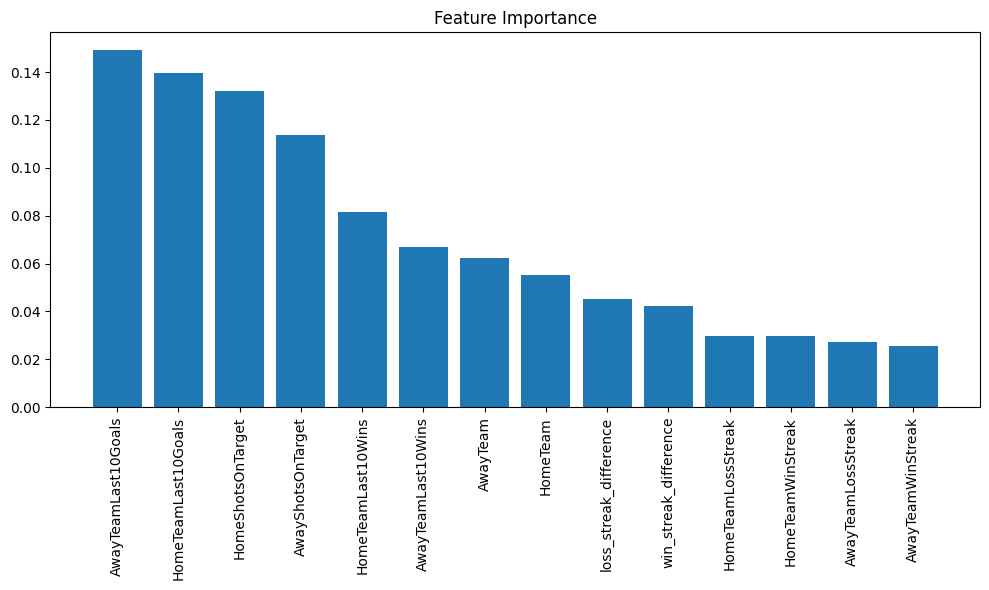

Cross-validation accuracy scores: [0.64177919 0.64733916 0.63939635 0.645469   0.64069952]
Mean cross-validation accuracy: 0.6429366431328774
Standard deviation of cross-validation accuracy: 0.0029890823663633165


In [14]:
# Checking overfitting  

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost: 0.65
Random Forest: 0.64
Gradient Boosting: 0.66
SVM: 0.66
Logistic Regression: 0.68
K-Nearest Neighbors: 0.52


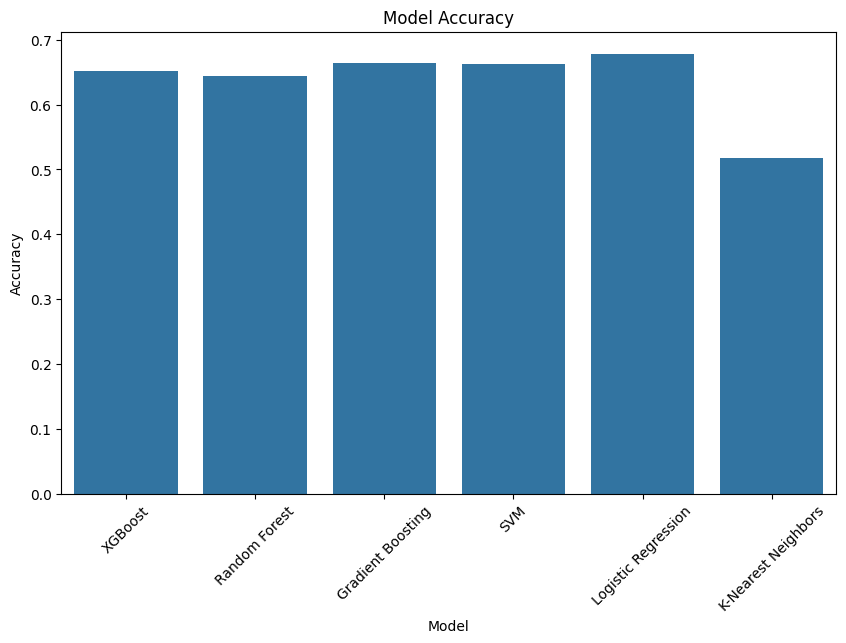

In [15]:
# Try other models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import os
from xgboost import XGBClassifier


# Create the models

models = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Print the accuracy of each model

for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy:.2f}')


# Plot the accuracy of each model

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a grid of hyperparameters for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
    'solver': ['liblinear', 'saga']  # Suitable solvers for small datasets and L1 penalty
}

# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform grid search
grid_search = GridSearchCV(log_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Retrain with best params if desired
best_log_model = grid_search.best_estimator_


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming your df_imputed is already available with the required columns
# Remove direct result-determining variables
features = ['AwayTeam', 'AwayShotsOnTarget', 'HomeTeam', 'HomeShotsOnTarget',
            'HomeTeamWinStreak', 'AwayTeamWinStreak', 'HomeTeamLossStreak',
            'AwayTeamLossStreak', 'win_streak_difference', 'loss_streak_difference',
            'HomeTeamLast10Goals', 'AwayTeamLast10Goals', 'HomeTeamLast10Wins',
            'AwayTeamLast10Wins']

# 1. Encode categorical features (e.g., HomeTeam, AwayTeam)
le_home = LabelEncoder()
le_away = LabelEncoder()

df_imputed['HomeTeam'] = le_home.fit_transform(df_imputed['HomeTeam'])
df_imputed['AwayTeam'] = le_away.fit_transform(df_imputed['AwayTeam'])

# 2. Define the features (X) and the target (y)
X = df_imputed[features]  # Features (dropping 'FullTimeResult', 'HomeGoals', 'AwayGoals')
y = df_imputed['FullTimeResult']  # Target (what we're predicting)

# 3. Split the df_imputed into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define a grid of hyperparameters for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
    'solver': ['liblinear', 'saga']  # Suitable solvers for small datasets and L1 penalty
}

# 5. Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 6. Perform grid search with cross-validation
grid_search = GridSearchCV(log_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 7. Best parameters from the grid search
print(f"Best parameters: {grid_search.best_params_}")

# 8. Retrain Logistic Regression with the best parameters
best_log_model = grid_search.best_estimator_

# 9. Make predictions on the test set
y_pred = best_log_model.predict(X_test)

# 10. Evaluate the model performance
print("Model Performance Report with Best Parameters:")
print(classification_report(y_test, y_pred))


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Model Performance Report with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72       375
         1.0       0.44      0.24      0.31       309
         2.0       0.72      0.87      0.79       575

    accuracy                           0.68      1259
   macro avg       0.62      0.62      0.61      1259
weighted avg       0.65      0.68      0.65      1259



In [20]:
# save the model to pkl file

import pickle

# Save the best model to Streamlit folder

best_model = max(accuracy_dict, key=accuracy_dict.get)
model = models[best_model]

# Define the path and filename

path = '../Streamlit/'

filename = 'model.pkl'  # Naming the file appropriately for multiple models
file_path = os.path.join(path, filename)

# Save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [21]:
features

['AwayTeam',
 'AwayShotsOnTarget',
 'HomeTeam',
 'HomeShotsOnTarget',
 'HomeTeamWinStreak',
 'AwayTeamWinStreak',
 'HomeTeamLossStreak',
 'AwayTeamLossStreak',
 'win_streak_difference',
 'loss_streak_difference',
 'HomeTeamLast10Goals',
 'AwayTeamLast10Goals',
 'HomeTeamLast10Wins',
 'AwayTeamLast10Wins']